In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt


In [2]:
sp500 = web.DataReader('SPX' , data_source='morningstar', start = '1/1/2000', end = '4/15/2018')

sp500.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4770 entries, (SPX, 2000-01-03 00:00:00) to (SPX, 2018-04-13 00:00:00)
Data columns (total 5 columns):
Close     4770 non-null float64
High      826 non-null float64
Low       826 non-null float64
Open      826 non-null float64
Volume    4770 non-null int64
dtypes: float64(4), int64(1)
memory usage: 237.7+ KB


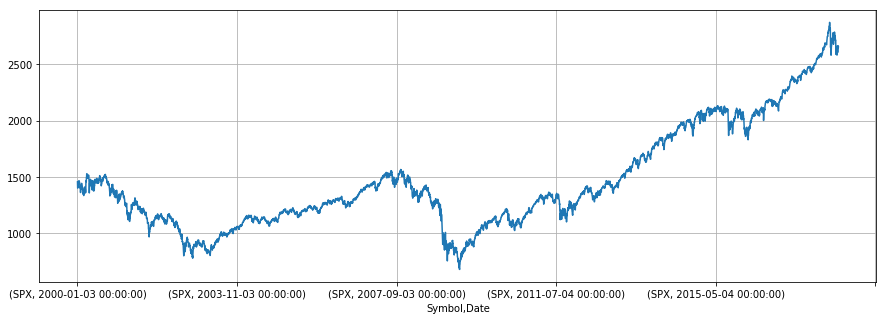

In [3]:
sp500['Close'].plot(grid=True,figsize = (15,5))
plt.show()

In [4]:
sp500['42d'] = np.round(pd.Series(sp500['Close']).rolling(window=42,center=False).mean(),2 )

sp500['252d'] = np.round(pd.Series(sp500['Close']).rolling(window=252,center=False).mean(),2 )


In [5]:
sp500[['Close','42d','252d']].tail()

Close      42d     252d
Symbol Date                                   
SPX    2018-04-09  2613.1588  2691.94  2562.92
       2018-04-10  2656.8680  2692.83  2564.14
       2018-04-11  2642.1902  2692.50  2565.21
       2018-04-12  2663.9948  2692.52  2566.30
       2018-04-13  2656.2969  2691.51  2567.37

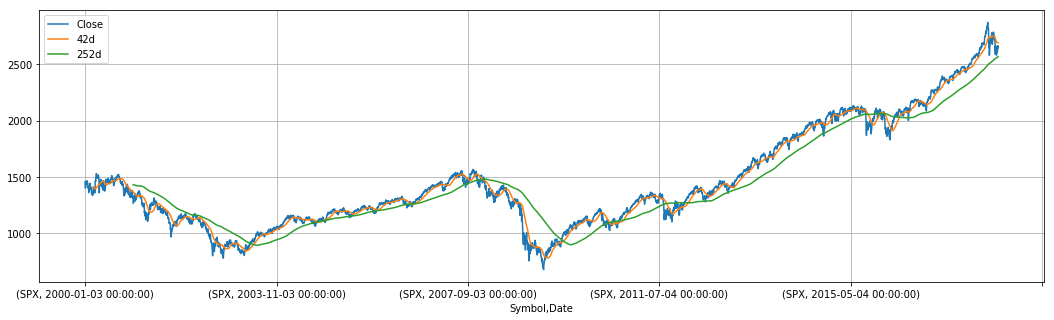

In [6]:
sp500[['Close','42d','252d']].plot(grid=True,figsize = (18,5))

In [7]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['42-252'].tail()

Symbol  Date      
SPX     2018-04-09    129.02
        2018-04-10    128.69
        2018-04-11    127.29
        2018-04-12    126.22
        2018-04-13    124.14
Name: 42-252, dtype: float64

In [8]:
sp500['42-252'].head()

Symbol  Date      
SPX     2000-01-03   NaN
        2000-01-04   NaN
        2000-01-05   NaN
        2000-01-06   NaN
        2000-01-07   NaN
Name: 42-252, dtype: float64

In [10]:
SD = 50
sp500['Regime'] = np.where(sp500['42-252']>SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252']<-SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()


 1    2342
 0    1450
-1     978
Name: Regime, dtype: int64

(-1.1, 1.1)

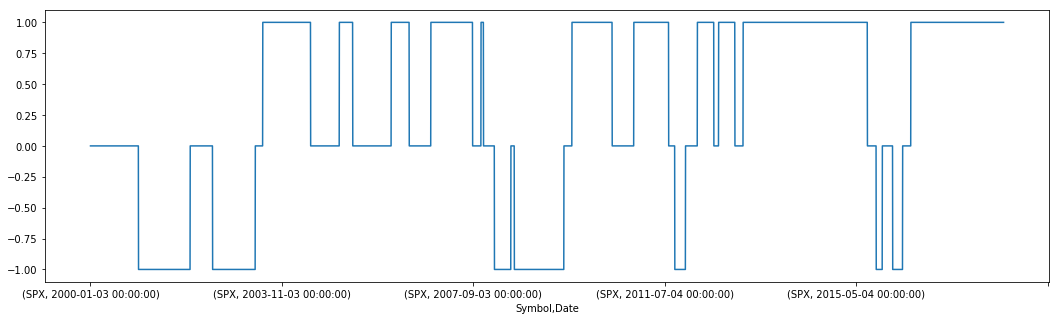

In [12]:
sp500['Regime'].plot(lw=1.5,figsize=(18,5))
plt.ylim([-1.1 , 1.1])

In [13]:
sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

In [14]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

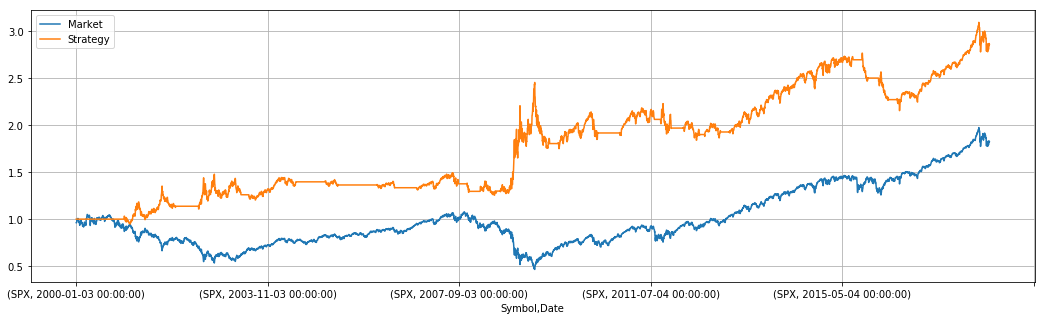

In [15]:
sp500[['Market','Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize = (18,5))